In [1]:
!python --version

Python 3.9.0


In [2]:
# import pandas as pd
# from besos import eppy_funcs as ef, sampling
# from besos.evaluator import EvaluatorEP
# from besos.optimizer import NSGAII, df_solution_to_solutions
# from besos.parameters import RangeParameter, expand_plist, wwr

# # from besos.parameters import expand_plist, RangeParameter, FieldSelector
# from besos.parameters import RangeParameter, FieldSelector, FilterSelector, Parameter, expand_plist, wwr, CategoryParameter, GenericSelector

# # from besos.selector import FieldSelector

# from besos.problem import EPProblem
# from matplotlib import pyplot as plt
# from platypus import Archive, Hypervolume, Solution

# from eppy.modeleditor import IDF
# import os

In [1]:
import pandas as pd
from besos import eppy_funcs as ef, sampling
from besos.evaluator import EvaluatorEP
from besos.optimizer import NSGAII, df_solution_to_solutions
# from besos.parameters import RangeParameter, expand_plist, wwr, FieldSelector, CategoryParameter
from besos.parameters import wwr, RangeParameter, FieldSelector, FilterSelector, GenericSelector, Parameter, expand_plist, CategoryParameter

from besos.problem import EPProblem
from matplotlib import pyplot as plt
from platypus import Archive, Hypervolume, Solution

# from eppy.modeleditor import IDF
import os

In [2]:
idf_path = 'data/office/Office_IDF_2_win_96.idf'
# idf_path = "data/office/Office_IDF_2_win.idf"
# idf_path = "data/office/test.idf"

epw_path = "D:/Categorized/polito/S3/ICT_in_Building_Design/Project/IDF-optimization/data/weather/FRA_Paris.Orly.071490_IWEC.epw"

In [3]:
building = ef.get_building(idf_path)

In [89]:
# building.view_model()

In [90]:
building.printidf()


Version,
    9.6;                      !- Version Identifier

SimulationControl,
    Yes,                      !- Do Zone Sizing Calculation
    Yes,                      !- Do System Sizing Calculation
    No,                       !- Do Plant Sizing Calculation
    No,                       !- Run Simulation for Sizing Periods
    Yes,                      !- Run Simulation for Weather File Run Periods
    ,                         !- Do HVAC Sizing Simulation for Sizing Periods
    ;                         !- Maximum Number of HVAC Sizing Simulation Passes

Building,
    Building,                 !- Name
    0,                        !- North Axis
    Suburbs,                  !- Terrain
    0.04,                     !- Loads Convergence Tolerance Value
    0.4,                      !- Temperature Convergence Tolerance Value
    FullExterior,             !- Solar Distribution
    25,                       !- Maximum Number of Warmup Days
    6;                        !- Minimum Nu

In [67]:
for key in building.idfobjects.keys():
    print(key)

VERSION
SIMULATIONCONTROL
PERFORMANCEPRECISIONTRADEOFFS
BUILDING
SHADOWCALCULATION
SURFACECONVECTIONALGORITHM:INSIDE
SURFACECONVECTIONALGORITHM:OUTSIDE
HEATBALANCEALGORITHM
HEATBALANCESETTINGS:CONDUCTIONFINITEDIFFERENCE
ZONEAIRHEATBALANCEALGORITHM
ZONEAIRCONTAMINANTBALANCE
ZONEAIRMASSFLOWCONSERVATION
ZONECAPACITANCEMULTIPLIER:RESEARCHSPECIAL
TIMESTEP
CONVERGENCELIMITS
HVACSYSTEMROOTFINDINGALGORITHM
COMPLIANCE:BUILDING
SITE:LOCATION
SITE:VARIABLELOCATION
SIZINGPERIOD:DESIGNDAY
SIZINGPERIOD:WEATHERFILEDAYS
SIZINGPERIOD:WEATHERFILECONDITIONTYPE
RUNPERIOD
RUNPERIODCONTROL:SPECIALDAYS
RUNPERIODCONTROL:DAYLIGHTSAVINGTIME
WEATHERPROPERTY:SKYTEMPERATURE
SITE:WEATHERSTATION
SITE:HEIGHTVARIATION
SITE:GROUNDTEMPERATURE:BUILDINGSURFACE
SITE:GROUNDTEMPERATURE:FCFACTORMETHOD
SITE:GROUNDTEMPERATURE:SHALLOW
SITE:GROUNDTEMPERATURE:DEEP
SITE:GROUNDTEMPERATURE:UNDISTURBED:FINITEDIFFERENCE
SITE:GROUNDTEMPERATURE:UNDISTURBED:KUSUDAACHENBACH
SITE:GROUNDTEMPERATURE:UNDISTURBED:XING
SITE:GROUNDDOMAIN:SLAB
SIT

In [78]:
idf_objects = building.idfobjects["FENESTRATIONSURFACE:DETAILED"]

for obj in idf_objects:
    if obj.Surface_Type == "Window":  # Only select windows
        print(f"Name: {obj.Name}, Construction Name: {obj.Construction_Name}")
        # print(obj.View_Factor_to_Ground)
        print(obj)

Name: Block1:OfficeXSWX1f_Wall_5_0_0_0_0_0_Win, Construction Name: Sgl Clr 6mm - 1001

FenestrationSurface:Detailed,
    Block1:OfficeXSWX1f_Wall_5_0_0_0_0_0_Win,    !- Name
    Window,                   !- Surface Type
    Sgl Clr 6mm - 1001,       !- Construction Name
    Block1:OfficeXSWX1f_Wall_5_0_0,    !- Building Surface Name
    ,                         !- Outside Boundary Condition Object
    AutoCalculate,            !- View Factor to Ground
    1,                        !- Frame and Divider Name
    1,                        !- Multiplier
    4,                        !- Number of Vertices
    -7.60573915,              !- Vertex 1 Xcoordinate
    -11.0151963605,           !- Vertex 1 Ycoordinate
    4.44,                     !- Vertex 1 Zcoordinate
    -2.34773915,              !- Vertex 2 Xcoordinate
    -11.0151963605,           !- Vertex 2 Ycoordinate
    4.44,                     !- Vertex 2 Zcoordinate
    -2.34773915,              !- Vertex 3 Xcoordinate
    -11.01519

In [6]:
idf_objects = building.idfobjects["ZONEVENTILATION:DESIGNFLOWRATE"]

# Debugging: List all ZoneInfiltration objects
for obj in idf_objects:
    print(obj.Name)
    # print(f"Name: {obj.Name}, Air Changes per Hour: {getattr(obj, 'Air_Changes_Per_Hour', 'Not Defined')}")

Block1:OfficeXSWX1f Nat Vent
Block1:OfficeXSEX1f Nat Vent
Block1:OfficeXNWX1f Nat Vent
Block1:OfficeXNEX1f Nat Vent
Block1:CorridorX1f Nat Vent
Block2:OfficeXSWX2f Nat Vent
Block2:OfficeXSEX2f Nat Vent
Block2:OfficeXNWX2f Nat Vent
Block2:OfficeXNEX2f Nat Vent
Block2:CorridorX2f Nat Vent


In [10]:
for obj in building.idfobjects["FenestrationSurface:Detailed"]:
    print(obj.Construction_Name)

Project internal door
Project internal door_Rev
Sgl Clr 6mm - 1001
Project internal door
Project internal door_Rev
Sgl Clr 6mm - 1001
Sgl Clr 6mm - 1001
Project internal door
Project internal door_Rev
Sgl Clr 6mm - 1001
Project internal door
Project internal door_Rev
Project internal door
Project internal door_Rev
Sgl Clr 6mm - 1001
Project internal door
Project internal door_Rev
Sgl Clr 6mm - 1001
Sgl Clr 6mm - 1001
Project internal door
Project internal door_Rev
Sgl Clr 6mm - 1001
Project internal door
Project internal door_Rev


In [ ]:
# for obj in building.idfobjects("WindowShadingControl"):
#     print(obj)

In [56]:
building.idfobjects["fenestrationsurface:detailed"]

[
FenestrationSurface:Detailed,
    Block1:OfficeXSWX1f_Partition_3_0_0_0_0_0_Door,    !- Name
    Door,                     !- Surface Type
    Project internal door,    !- Construction Name
    Block1:OfficeXSWX1f_Partition_3_0_0,    !- Building Surface Name
    Block1:CorridorX1f_Partition_6_0_0_0_0_0_Door_10005,    !- Outside Boundary Condition Object
    0,                        !- View Factor to Ground
    ,                         !- Frame and Divider Name
    1,                        !- Multiplier
    4,                        !- Number of Vertices
    -4.52673915,              !- Vertex 1 Xcoordinate
    -3.0151963605,            !- Vertex 1 Ycoordinate
    3.6,                      !- Vertex 1 Zcoordinate
    -5.42673915,              !- Vertex 2 Xcoordinate
    -3.0151963605,            !- Vertex 2 Ycoordinate
    3.6,                      !- Vertex 2 Zcoordinate
    -5.42673915,              !- Vertex 3 Xcoordinate
    -3.0151963605,            !- Vertex 3 Ycoordinate
   

### Wall and roof Insulation params

In [4]:
roof_ins = FieldSelector(
    class_name='Material',
    object_name='_InsulationEX_Roof_.01',
    field_name='Thickness'
)
roof_range = RangeParameter(min_val=0.1,max_val=0.5)

wall_ins = FieldSelector(
    class_name='Material', 
    object_name='_InsulationEX_.01', 
    field_name='Thickness'
)
wall_range = RangeParameter(min_val=0.1,max_val=0.5)

insulation_param = [
    Parameter(selector=wall_ins,
             value_descriptors=wall_range,
             name='Wall Insulation'),
    Parameter(selector=roof_ins,
             value_descriptors=roof_range,
             name='Roof Insulation')
]

In [5]:
# windows_sel = FieldSelector(
#     class_name="Fenestrationsurface:Detailed",
#     object_name="*",
#     field_name="Construction Name",

# )

# windows_range = CategoryParameter([
#     "Sgl Clr 6mm - 1001",
#      "Sgl Clr 6mm - 2001",
#      "Dbl LoE (e2=.1) Clr 6mm/13 mm Arg - 1003",
#      "Dbl LoE (e2=.1) Clr 6mm/13mm Arg - 2003",
#      "Trp LoE (e2=e5=.1) Clr 3mm/13mm Arg - 1002",
#      "Trp LoE (e2=e5=.1) Clr 3mm/13mm Arg - 2002"
#     ]
# )

# windows_param = Parameter(
#     selector=windows_sel,
#     value_descriptors=windows_range,
#     name="Windows Type"
# )

### Window and shading params 

In [73]:
class WindowFieldSelector(FieldSelector):
    """Custom FieldSelector to filter FenestrationSurface:Detailed objects with Surface_Type == 'Window'."""
    def get_objects(self, building):
        objects = super().get_objects(building)
        return [obj for obj in objects if getattr(obj, "Surface_Type", "").lower() == "window"]


# Define window selector and parameter
windows_sel = WindowFieldSelector(
    class_name="FenestrationSurface:Detailed",
    object_name="*",  # Matches all objects in the class
    field_name="Construction Name",
)

windows_range = CategoryParameter([
    "Sgl Clr 6mm - 1001",
    "Sgl Clr 6mm - 2001",
    "Dbl LoE (e2=.1) Clr 6mm/13 mm Arg - 1003",
    "Dbl LoE (e2=.1) Clr 6mm/13mm Arg - 2003",
    "Trp LoE (e2=e5=.1) Clr 3mm/13mm Arg - 1002",
    "Trp LoE (e2=e5=.1) Clr 3mm/13mm Arg - 2002"
])

windows_param = Parameter(
    selector=windows_sel,
    value_descriptors=windows_range,
    name="Windows Type"
)

In [27]:
# Custom FieldSelector for Windows
class WindowFieldSelector(FieldSelector):
    """Custom FieldSelector to filter FenestrationSurface:Detailed objects with Surface_Type == 'Window'."""
    def get_objects(self, building):
        objects = super().get_objects(building)
        return [obj for obj in objects if getattr(obj, "Surface_Type", "").lower() == "window"]

class ShadingControlSelector(FieldSelector):
    """Custom FieldSelector to synchronize shading constructions."""
    def __init__(self, *args, windows_mapping=None, shaded_constructions=None, **kwargs):
        super().__init__(*args, **kwargs)
        self.windows_mapping = windows_mapping
        self.shaded_constructions = shaded_constructions  # List of valid shaded constructions

    def set(self, building, value):
        """
        Update the Construction with Shading Name for each shading control object
        based on the current Construction Name in FenestrationSurface:Detailed.
        """
        shading_objects = super().get_objects(building)
        for shading_obj in shading_objects:
            # Find the corresponding window object
            window_name = getattr(shading_obj, "Fenestration_Surface_1_Name", None)
            if not window_name:
                continue
            window_obj = next(
                (win for win in self.windows_mapping if win.Name == window_name), None
            )
            if window_obj:
                # Ensure valid mapping of unshaded to shaded constructions
                unshaded_construction = window_obj.Construction_Name
                shaded_construction = self.shaded_constructions.get(unshaded_construction)
                if shaded_construction:
                    shading_obj.Construction_with_Shading_Name = shaded_construction
                else:
                    raise ValueError(
                        f"No valid shaded construction found for {unshaded_construction}"
                    )

# Example mapping of unshaded to shaded constructions
shaded_constructions_map = {
    "Sgl Clr 6mm - 1001": "Sgl Clr 6mm - 2001",
    "Dbl LoE (e2=.1) Clr 6mm/13 mm Arg - 1003": "Dbl LoE (e2=.1) Clr 6mm/13mm Arg - 2003",
    "Trp LoE (e2=e5=.1) Clr 3mm/13mm Arg - 1002": "Trp LoE (e2=e5=.1) Clr 3mm/13mm Arg - 2002",
}

# Update selector
shading_sel = ShadingControlSelector(
    class_name="WindowShadingControl",
    object_name="*",
    field_name="Construction with Shading Name",
    windows_mapping=windows_sel.get_objects(building),  # Pass the window objects
    shaded_constructions=shaded_constructions_map,     # Pass the mapping
)

# Define selectors and parameters
windows_sel = WindowFieldSelector(
    class_name="FenestrationSurface:Detailed",
    object_name="*",  # Matches all objects in the class
    field_name="Construction Name",
)

# shading_sel = ShadingControlSelector(
#     class_name="WindowShadingControl",
#     object_name="*",  # Matches all shading objects
#     field_name="Construction with Shading Name",
# )

# Define value range
windows_range = CategoryParameter([
    "Sgl Clr 6mm - 1001",
    "Sgl Clr 6mm - 2001",
    "Dbl LoE (e2=.1) Clr 6mm/13 mm Arg - 1003",
    "Dbl LoE (e2=.1) Clr 6mm/13mm Arg - 2003",
    "Trp LoE (e2=e5=.1) Clr 3mm/13mm Arg - 1002",
    "Trp LoE (e2=e5=.1) Clr 3mm/13mm Arg - 2002"
])

# Parameters for windows and shading controls
windows_param = Parameter(
    selector=windows_sel,
    value_descriptors=windows_range,
    name="Windows Type"
)

shading_param = Parameter(
    selector=shading_sel,
    value_descriptors=windows_range,  # Same categories as windows
    name="Shading Type"
)

# Add parameters to optimization problem
parameters = [windows_param]

C:\Users\Saeed\AppData\Local\Programs\Python\Python39\lib\site-packages\besos\parameters.py:442: UserWarning: This parameter's descriptor is already named Windows Type.The name used as an input (Shading Type) will be discarded.
  warnings.warn(


### Ventilations params

In [18]:
for obj in building.idfobjects["ZoneVentilation:DesignFlowRate"]:
    print(obj)


ZoneVentilation:DesignFlowRate,
    Block1:OfficeXSWX1f Nat Vent,    !- Name
    Block1:OfficeXSWX1f,      !- Zone or ZoneList Name
    _Summer_Ventilation,      !- Schedule Name
    Flow/zone,                !- Design Flow Rate Calculation Method
    0.342611,                 !- Design Flow Rate
    ,                         !- Flow Rate per Zone Floor Area
    ,                         !- Flow Rate per Person
    ,                         !- Air Changes per Hour
    NATURAL,                  !- Ventilation Type
    0,                        !- Fan Pressure Rise
    1,                        !- Fan Total Efficiency
    1,                        !- Constant Term Coefficient
    0,                        !- Temperature Term Coefficient
    0,                        !- Velocity Term Coefficient
    0,                        !- Velocity Squared Term Coefficient
    24,                       !- Minimum Indoor Temperature
    ,                         !- Minimum Indoor Temperature Schedule

In [6]:
ventilation_minimum_sel = FieldSelector(
    class_name='ZoneVentilation:DesignFlowRate',
    object_name='*',
    field_name='Minimum Indoor Temperature'
)

ventilation_maximum_sel = FieldSelector(
    class_name='ZoneVentilation:DesignFlowRate',
    object_name='*',
    field_name='Maximum Outdoor Temperature'
)

min_in_temp_range = RangeParameter(min_val=20, max_val=26)
max_out_temp_range = RangeParameter(min_val=26, max_val=30)

ventilation_min_param = Parameter(
    selector=ventilation_minimum_sel,
    value_descriptors=min_in_temp_range,
    name="Ventilation Minimum Indoor Temperature"
)
ventilation_max_param = Parameter(
    selector=ventilation_maximum_sel,
    value_descriptors=max_out_temp_range,
    name="Ventilation Maximum Outdoor Temperature"
)

ventilation_param = [ventilation_min_param, ventilation_max_param]

### Lighting params

In [7]:
for light in building.idfobjects["Lights"]:
    print(light.Name)

Block1:OfficeXSWX1f General lighting
Block1:OfficeXSEX1f General lighting
Block1:OfficeXNWX1f General lighting
Block1:OfficeXNEX1f General lighting
Block1:CorridorX1f General lighting
Block2:OfficeXSWX2f General lighting
Block2:OfficeXSEX2f General lighting
Block2:OfficeXNWX2f General lighting
Block2:OfficeXNEX2f General lighting
Block2:CorridorX2f General lighting


In [8]:
# # light_object_names = list()

# # idf_objects = building.idfobjects["Lights"]
# # for obj in idf_objects:
# #     light_object_names.append(obj.Name)
    
# lights_range = RangeParameter(min_val=2, max_val=5)

# lights_objects = list()
# for light in building.idfobjects["Lights"]:
#     light_name = light.Name.split(' ')[0]
#     lights_objects.append(
#         Parameter(
#             selector=FieldSelector(class_name='Lights', object_name=light.Name, field_name='Watts per Zone Floor Area'),
#             value_descriptors=lights_range,
#             name=light_name
#         )
#     )

In [9]:
light_sel = FieldSelector(class_name='Lights', object_name="*", field_name='Watts per Zone Floor Area')
lights_range = RangeParameter(min_val=2, max_val=5)
light_param = Parameter(
    selector=light_sel,
    value_descriptors=lights_range,
    name="Light"
)

### Params

In [10]:
parameters = None

In [11]:
parameters = insulation_param
# parameters += [windows_param]
parameters += ventilation_param
parameters += [light_param]

In [12]:
objectives = [
    "DistrictCooling:Facility",  # Cooling energy needs
    "DistrictHeating:Facility",  # Heating energy needs
    "Lighting:Facility",  # Lighting energy needs
    # "Zone Mean Air Temperature",  # Thermal comfort - indoor temperatures
    # "Zone PMV"  # Predicted Mean Vote for thermal comfort
]

In [13]:
# # Define parameters for optimization based on provided inputs
# parameters = expand_plist({
#     "_InsulationEX_Roof_.01": {"Thickness": (0.01, 0.3)},  # Roof insulation thickness
#     "_InsulationEX_.01": {"Thickness": (0.01, 0.3)},  # Wall insulation thickness
#     # "FenestrationSurface:Detailed": {"Construction Name": (0, 4)},  # Window types encoded as indices
#     # "WindowShadingControl": {"Setpoint": (10, 50)},  # Shading control thresholds
#     # "ZoneVentilation:DesignFlowRate": {"Air Changes Per Hour": (0, 6)},  # Natural ventilation rate
#     # "Lights": {"Watts per Zone Area": (2, 7.5)},  # Artificial lighting power density
#     # "Daylighting:Controls": {"Illuminance Setpoint": (300, 500)},  # Daylighting setpoint
#     # "ZoneHVAC:IdealLoadsAirSystem": {"Maximum Outdoor Temperature": (10, 35)},  # Mech. ventilation max temp
#     # "ZoneHVAC:IdealLoadsAirSystem": {"Delta Temperature": (0, 15)},  # Mech. ventilation delta temp
#     # "DesignSpecification:OutdoorAir": {"Outdoor Air Flow Air Changes per Hour": (0.1, 1.0)},  # Mech. ventilation airflow
# })

In [14]:
besos_problem = EPProblem(parameters, objectives)

In [15]:
list(besos_problem)

[Parameter(selector=FieldSelector(field_name='Thickness', class_name='Material', object_name='_InsulationEX_.01'), value_descriptors=[RangeParameter(min=0.1, max=0.5)]),
 Parameter(selector=FieldSelector(field_name='Thickness', class_name='Material', object_name='_InsulationEX_Roof_.01'), value_descriptors=[RangeParameter(min=0.1, max=0.5)]),
 Parameter(selector=FieldSelector(field_name='Minimum Indoor Temperature', class_name='ZoneVentilation:DesignFlowRate', object_name='*'), value_descriptors=[RangeParameter(min=22, max=26)]),
 Parameter(selector=FieldSelector(field_name='Maximum Outdoor Temperature', class_name='ZoneVentilation:DesignFlowRate', object_name='*'), value_descriptors=[RangeParameter(min=26, max=28)]),
 Parameter(selector=FieldSelector(field_name='Watts per Zone Floor Area', class_name='Lights', object_name='*'), value_descriptors=[RangeParameter(min=2, max=5)]),
 MeterReader(class_name='Output:Meter', func=<function sum_values at 0x0000024A53F1A5E0>, key_name='District

In [16]:
print("Number of Inputs in Problem:", besos_problem.num_inputs)

Number of Inputs in Problem: 5


In [17]:
# Define evaluator for the problem
evaluator = EvaluatorEP(
    besos_problem, building,
    out_dir="outputdir",
    err_dir="outputdir",
    epw=epw_path
)


samples = sampling.dist_sampler(sampling.lhs, besos_problem, num_samples=1)
samples

,Wall Insulation,Roof Insulation,Ventilation Minimum Temperature,Ventilation Maximum Temperature,Light
0,0.454222,0.458693,24.907127,27.772197,4.038333


In [ ]:
# Evaluate the samples
sim_samples = evaluator.df_apply(
    samples,
    keep_input=True, 
    # processes=4  # Adjust based on your system’s resources
)

Executing:   0%|          | 0/1 [00:00<?, ?row/s]

Wall Insulation                     0.454222
Roof Insulation                     0.458693
Ventilation Minimum Temperature    24.907127
Ventilation Maximum Temperature    27.772197
Light                               4.038333
Name: 0, dtype: float64
[
Material,
    _InsulationEX_.01,        !- Name
    Rough,                    !- Roughness
    0.01,                     !- Thickness
    0.034,                    !- Conductivity
    35,                       !- Density
    1400,                     !- Specific Heat
    0.9,                      !- Thermal Absorptance
    0.6,                      !- Solar Absorptance
    0.6;                      !- Visible Absorptance
]
[
Material,
    _InsulationEX_Roof_.01,    !- Name
    Rough,                    !- Roughness
    0.01,                     !- Thickness
    0.04,                     !- Conductivity
    12,                       !- Density
    840,                      !- Specific Heat
    0.9,                      !- Thermal Absorptanc

In [ ]:
sim_samples

In [ ]:
# # # Set the IDD file path explicitly
# # idd_path = os.path.join(r"C:\EnergyPlusV9-4-0", "Energy+.idd")
# # IDF.setiddname(idd_path)

# idf_path = "data/office/Office_IDF_2_win.idf"
# ep_path = r"C:\EnergyPlusV9-4-0"
# idf_version = "9-4-0"
# building = ef.get_building(idf_path, ep_path)

In [36]:
parameters = expand_plist(
    {"XPS Extruded Polystyrene  - CO2 Blowing_0041": 
     {
         "Thickness": (0.01, 0.3)
     },
    }  # Name from IDF Building object,

)

parameters.append(
    wwr(RangeParameter(0.1, 0.9))
)  # Example: Add window-to-wall ratio as a parameter


objectives = ["DistrictCooling:Facility", "DistrictHeating:Facility"]

In [26]:
# # Parameter Space
# parameters = []

# orientation = FieldSelector(class_name='Building', field_name='North Axis')
# orientation_descriptor = CategoryParameter(options=[0, 90, 180, 270])

# insulation = FieldSelector(class_name='Material', object_name='XPS Extruded Polystyrene  - CO2 Blowing_.O792', 
#                            field_name='Thickness')
# insulation_descriptor = RangeParameter(min_val = 0.01, max_val=0.5) 

# shading = FieldSelector(class_name='WindowShadingControl',field_name='Setpoint')
# shading_descriptor = RangeParameter(min_val = 0, max_val=30)

# ventilation = FieldSelector(class_name='ZoneVentilation:DesignFlowRate',field_name='Design Flow Rate')
# ventilation_descriptor = CategoryParameter(options=[0, 0.12])


# # parameters = [Orientation, ventilation, shading, insulation, wwr]
# parameters.append(Parameter(selector=orientation, 
#                             value_descriptors=orientation_descriptor,
#                             name='Orientation'))

# parameters.append(Parameter(selector=ventilation,
#                             value_descriptors=ventilation_descriptor,
#                             name='Ventilation'))

# parameters.append(Parameter(selector=shading,
#                             value_descriptors=shading_descriptor,
#                             name='Shading'))

# parameters.append(Parameter(selector=insulation,
#                             value_descriptors=insulation_descriptor,
#                             name='Insulation Thickness'))

# parameters.append(wwr(RangeParameter(0.1,0.9))) 

# # Objectives of our problem which is to minimize the TOTAL COMSUMPTION
# objectives = ['Electricity:Facility','DistrictCooling:Facility', 'DistrictHeating:Facility']

# # problem = parameters + objectives
# besos_problem = EPProblem(parameters, objectives)

# # EPProblem vs EvaluatorEP = problem + building + weather
# evaluator = EvaluatorEP(besos_problem, building, out_dir='outputdir', err_dir='outputdir', epw=epw_path) 

# # evaluate the problem with some possible values change sample number
# samples = sampling.dist_sampler(sampling.lhs, besos_problem, num_samples=10)

In [37]:
besos_problem = EPProblem(parameters, objectives)
samples = pd.DataFrame.from_dict({"0": [0.2, 0.5]}, orient="index")
samples

,0,1
0,0.2,0.5


In [38]:
# return dataframe with results described in objectives
evaluator = EvaluatorEP(
    besos_problem, building, out_dir="outputdir", err_dir="outputdir", epw=epw_path
)
outputs = evaluator.df_apply(samples, keep_input=True, processes=1)

Executing:   0%|          | 0/1 [00:00<?, ?row/s]

0    0.2
1    0.5
Name: 0, dtype: float64
[
Material,
    XPS Extruded Polystyrene  - CO2 Blowing_0041,    !- Name
    Rough,                    !- Roughness
    0.041,                    !- Thickness
    0.034,                    !- Conductivity
    35,                       !- Density
    1400,                     !- Specific Heat
    0.9,                      !- Thermal Absorptance
    0.6,                      !- Solar Absorptance
    0.6;                      !- Visible Absorptance
]


In [39]:
outputs

,0,1,DistrictCooling:Facility,DistrictHeating:Facility
0,0.2,0.5,1.924125e+10,3.831721e+10


In [18]:
besos_problem = EPProblem(parameters, objectives)

In [19]:
samples = sampling.dist_sampler(sampling.lhs, besos_problem, num_samples=20)

In [20]:
samples

,Thickness,Thickness_1
0,0.026498,0.119684
1,0.070523,0.287351
2,0.227884,0.278313
3,0.137308,0.218852
4,0.162698,0.171038
5,0.053872,0.129591
6,0.202866,0.089121
7,0.023011,0.075906
8,0.177891,0.249139
9,0.040705,0.022393


In [66]:
# # Define parameters
# parameters = expand_plist({
#     "_InsulationEX_Roof_.01": {"Thickness": (0.01, 0.3)},  # Roof insulation
#     "_InsulationEX_.01": {"Thickness": (0.01, 0.3)},  # Wall insulation
#     "FenestrationSurface:Detailed": {"Construction Name": (0, 2)},  # Window types
# })

# # Debug the IDF objects and fields
# idf_objects = idf.idfobjects["FENESTRATIONSURFACE:DETAILED"]
# for obj in idf_objects:
#     print(obj.Name, getattr(obj, "Construction_Name", "Field not found"))  # Debug field access

# # Define objectives
# objectives = [
#     "DistrictCooling:Facility",
#     "DistrictHeating:Facility",
#     "Lighting:Facility",
#     "Zone Mean Air Temperature",
#     "Zone PMV"
# ]

# # Create EPProblem
# besos_problem = EPProblem(parameters, objectives)


In [67]:
evaluator = EvaluatorEP(
    besos_problem, building, out_dir="outputdir", err_dir="outputdir", epw=epw_path
)

In [68]:
samples = pd.DataFrame.from_dict(
    {"0": [0.2,0.5]}, orient="index"
)  

In [69]:
samples

,0,1
0,0.2,0.5


In [70]:
sim_samples = evaluator.df_apply(samples,
                             keep_input=True, 
                             # keep_dirs=True,
                             processes=4
                        )  # flag keep_dirs to True to save all ouput

0    0.2
1    0.5
Name: 0, dtype: float64
[
Material,
    XPS Extruded Polystyrene  - CO2 Blowing_0041,    !- Name
    Rough,                    !- Roughness
    0.041,                    !- Thickness
    0.034,                    !- Conductivity
    35,                       !- Density
    1400,                     !- Specific Heat
    0.9,                      !- Thermal Absorptance
    0.6,                      !- Solar Absorptance
    0.6;                      !- Visible Absorptance
]


In [71]:
sim_samples

,0,1,DistrictCooling:Facility,DistrictHeating:Facility
0,0.2,0.5,1.924125e+10,3.831721e+10


In [81]:
sim_samples.to_csv('outputdir/surrogate_simple_simulation.csv')

In [ ]:
results = NSGAII(evaluator, evaluations=10, population_size=20)
results

In [82]:
results.to_csv("outputdir/sim_simulation_optimized.csv")

Text(0, 0.5, 'Heating demand')

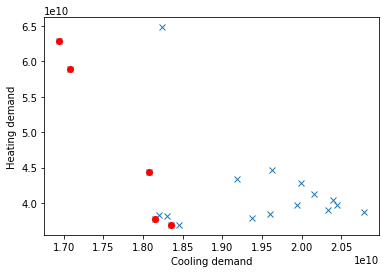

In [71]:
optres = results.loc[
    results["pareto-optimal"] == True, :
]  # Get only the optimal results
plt.plot(
    results["DistrictCooling:Facility"], results["DistrictHeating:Facility"], "x"
)  # Plot all results in the background as blue crosses
plt.plot(
    optres["DistrictCooling:Facility"], optres["DistrictHeating:Facility"], "ro"
)  # Plot optimal results in red
plt.xlabel("Cooling demand")
plt.ylabel("Heating demand")

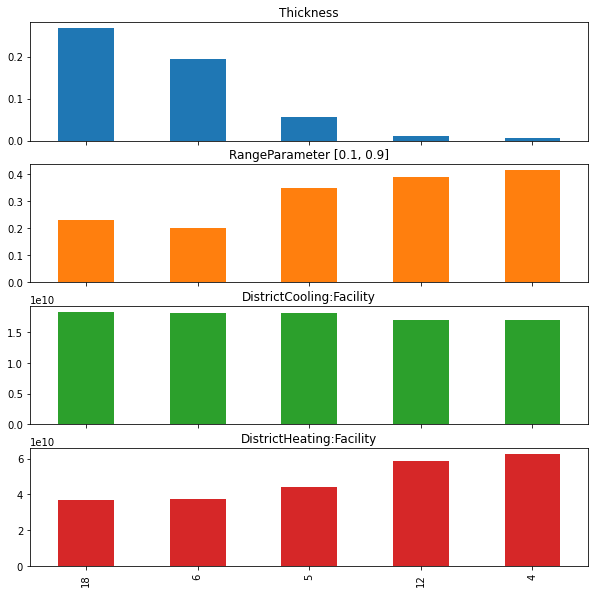

In [72]:
optres = optres.sort_values("DistrictHeating:Facility")  # Sort by the first objective
optresplot = optres.drop(columns="violation")  # Remove the constraint violation column
ax = optresplot.plot.bar(
    subplots=True, legend=None, figsize=(10, 10)
)  # Plot the variable values of each of the optimal solutions

In [74]:
evaluator_costrain = EvaluatorEP(
    EPProblem(
        parameters,
        objectives,
        constraints=["CO2:Facility"],
        constraint_bounds=["<=800"],
    ),
    idf,
    out_dir="outputdir"
)

In [75]:
results_costrain = NSGAII(evaluator, evaluations=1, population_size=10)

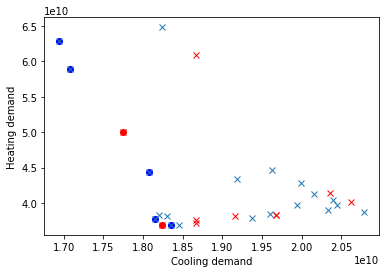

In [79]:
optres_costrain = results_costrain.loc[results_costrain["pareto-optimal"] == True, :]
plt.plot(
    optres["DistrictCooling:Facility"], optres["DistrictHeating:Facility"], "bo"
)  # Plot first optimal results in blue
plt.plot(
    optres_costrain["DistrictCooling:Facility"], optres_costrain["DistrictHeating:Facility"], "ro"
)  # Plot second optimal results in red

plt.plot(
    results["DistrictCooling:Facility"], results["DistrictHeating:Facility"], "x"
) 
plt.plot(
    results_costrain["DistrictCooling:Facility"], results_costrain["DistrictHeating:Facility"], "rx"
) 
plt.xlabel("Cooling demand")
plt.ylabel("Heating demand")
plt.show()

In [85]:
features = list(samples.columns)
print(features)
print(objectives)

['Thickness', 'RangeParameter [0.1, 0.9]']
['DistrictCooling:Facility', 'DistrictHeating:Facility']


In [83]:
import plotly
plotly.offline.init_notebook_mode(connected=True)

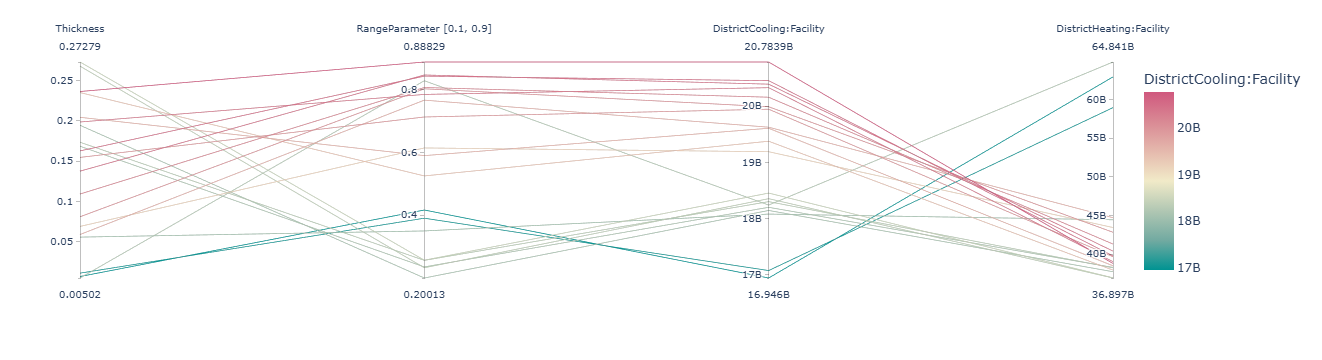

In [87]:
import plotly.express as px
fig = px.parallel_coordinates(results, color="DistrictCooling:Facility", dimensions=features+objectives,
                             color_continuous_scale=px.colors.diverging.Tealrose)
fig.show()